In [35]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
test_unknown_data_path = './data/2_rf_test_unknown_data.csv'
test_unknown_data = pd.read_csv(test_unknown_data_path)

test_unknown_label_path = './data/2_rf_test_unknown_label.csv'
test_unknown_label = pd.read_csv(test_unknown_label_path)

print("test_unknown_data shape:", test_unknown_data.shape)
print("test_unknown_data shape:", test_unknown_data.columns)


test_unknown_data shape: (5728, 46)
test_unknown_data shape: Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')


In [37]:
import pickle

In [38]:
with open('./data/4_gan_data_v1.pkl', 'rb') as file:
    gan_data_v1 = pickle.load(file)
with open('./data/4_gan_label_v1.pkl', 'rb') as file:
    gan_label_v1 = pickle.load(file)

In [39]:
with open('./data/4_gan_data_v2.pkl', 'rb') as file:
    gan_data_v2 = pickle.load(file)
with open('./data/4_gan_label_v2.pkl', 'rb') as file:
    gan_label_v2 = pickle.load(file)

In [40]:
with open('./data/class_mapping.pkl', 'rb') as file:
    class_mapping = pickle.load(file)


In [41]:
# flip the dictionary. key into value, and vice versa
flipped_dict = dict((v, k) for k, v in class_mapping.items())

In [42]:
gan_label_v1 = pd.DataFrame(gan_label_v1)
gan_label_v2 = pd.DataFrame(gan_label_v2)

In [43]:
gan_label_v1['label'] = gan_label_v1['label'].replace(flipped_dict)
gan_label_v2['label'] = gan_label_v2['label'].replace(flipped_dict)

In [45]:
attacks = ['DDoS', 'DoS', 'Mirai', 'Recon']

def mergeAttacks(dataframe, attacks):
    """ Merge attacks into big category

    Args:
        dataframe(Pandas dataframe): Contains specific attacks

    Return:
        (Pandas dataframe): merged dataframe
    """

    dataframe.loc[dataframe['label'].str.contains('DDoS'), 'label'] = 'andrew-nah'

    for attack in attacks:
        if attack == 'DDoS':
            continue
        dataframe.loc[dataframe['label'].str.contains(attack), 'label'] = attack
    
    dataframe.loc[dataframe['label'].str.contains('andrew-nah'), 'label'] = 'DDoS'
    
    return dataframe

In [46]:
gan_label_v1 = mergeAttacks(gan_label_v1, attacks)
gan_label_v2 = mergeAttacks(gan_label_v2, attacks)

In [47]:
def dropMajor(data, label):
    """ Drop the designated attacks

    Args:
        data(Pandas dataframe): data without labels
        label(Pandas dataframe): corresponding labels to data

    Return:
        (Pandas dataframe): dataframe without designated attacks

    """
    df = pd.concat([data, label], axis=1)
    df_filtered = df.drop(df[df['label'].isin(['DDoS', 'DoS', 'Mirai'])].index)
    return df_filtered


In [48]:
gan_dropped_v1 = dropMajor(gan_data_v1, gan_label_v1)
gan_dropped_v2 = dropMajor(gan_data_v2, gan_label_v2)

In [49]:
gan_dropped_data_v1 = gan_dropped_v1.drop(columns=['label'])
gan_dropped_label_v1 = pd.DataFrame(gan_dropped_v1['label'])
gan_dropped_data_v2 = gan_dropped_v2.drop(columns=['label'])
gan_dropped_label_v2 = pd.DataFrame(gan_dropped_v2['label'])

In [50]:
merged_gan_data = pd.concat([gan_dropped_data_v1, gan_dropped_data_v2], axis=0)
merged_gan_label = pd.concat([gan_dropped_label_v1, gan_dropped_label_v2], axis=0)

In [51]:
train_data = pd.concat([test_unknown_data, merged_gan_data], axis=0)
train_label = pd.concat([test_unknown_label, merged_gan_label], axis=0)


In [52]:
train_label.value_counts()

label               
BenignTraffic           25237
Recon                     271
MITM-ArpSpoofing          199
DNS_Spoofing              138
BrowserHijacking           37
CommandInjection           23
Backdoor_Malware           20
DictionaryBruteForce       19
SqlInjection               13
DoS                         2
XSS                         2
VulnerabilityScan           1
Name: count, dtype: int64

In [53]:
knn_clf_26 = KNeighborsClassifier(n_neighbors=26)
knn_clf_20 = KNeighborsClassifier(n_neighbors=20)
knn_clf_15 = KNeighborsClassifier(n_neighbors=15)
knn_clf_10 = KNeighborsClassifier(n_neighbors=10)
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)

In [54]:
knn_list = []
knn_list.append(knn_clf_26)
knn_list.append(knn_clf_20)
knn_list.append(knn_clf_15)
knn_list.append(knn_clf_10)
knn_list.append(knn_clf_5)

In [55]:
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Suppress all warnings
warnings.filterwarnings("ignore")

# Assuming test_unknown_data is your test data
# Drop the 'label' column from test_unknown_data
#test_unknown_data = test_unknown_data.drop('label', axis=1)

# Apply label encoding separately to each column in test_unknown_label
label_encoder = LabelEncoder()
test_unknown_label_encoded = label_encoder.fit_transform(test_unknown_label)

# Train the kNN classifier on your training data
# Use the appropriate labels from your dataset; I'm using the first column as an example
knn_clf = KNeighborsClassifier(n_neighbors=5)
# Assuming your_training_data and your_training_labels are your original training data and labels
knn_clf.fit(train_data, train_label.values.ravel())  

# Make predictions on the test data
predictions = knn_clf.predict(np.array(test_unknown_data))

# Optionally, you can evaluate the performance of the classifier
# Assuming y_true is the actual labels for evaluation
accuracy = accuracy_score(test_unknown_label_encoded, predictions)
print(f'Accuracy for kNN with {knn_clf.n_neighbors} neighbors: {accuracy}')

# Loop through each kNN classifier in knn_list
for knn_clf in knn_list:
    # Train the kNN classifier on your training data
    knn_clf.fit(train_data, train_label.values.ravel()) 

    # Make predictions on the test data
    predictions = knn_clf.predict(np.array(test_unknown_data))

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(test_unknown_label.values.ravel(), predictions)
    
    # Print the accuracy for each kNN classifier
    print(f'Accuracy for kNN with {knn_clf.n_neighbors} neighbors: {accuracy}')


Accuracy for kNN with 5 neighbors: 0.0
Accuracy for kNN with 26 neighbors: 0.8846019553072626
Accuracy for kNN with 20 neighbors: 0.8846019553072626
Accuracy for kNN with 15 neighbors: 0.8866969273743017
Accuracy for kNN with 10 neighbors: 0.8896648044692738
Accuracy for kNN with 5 neighbors: 0.8949022346368715


11456
[[ 4.14684443  1.41540218]
 [ 0.35551116  0.9018632 ]
 [-0.95532068  1.26291806]
 ...
 [-4.04559317  4.78479157]
 [-1.31557354  1.51475143]
 [14.253078    5.29902366]]
527 527 527
xx[0][0] = -7.2562601257989305, yy[0][0] = -6.325158130617928, Z[0][0] = 0
xx[0][1] = -6.2562601257989305, yy[0][1] = -6.325158130617928, Z[0][1] = 0
xx[0][2] = -5.2562601257989305, yy[0][2] = -6.325158130617928, Z[0][2] = 0
xx[0][3] = -4.2562601257989305, yy[0][3] = -6.325158130617928, Z[0][3] = 0
xx[0][4] = -3.2562601257989305, yy[0][4] = -6.325158130617928, Z[0][4] = 0
xx[0][5] = -2.2562601257989305, yy[0][5] = -6.325158130617928, Z[0][5] = 0
xx[0][6] = -1.2562601257989305, yy[0][6] = -6.325158130617928, Z[0][6] = 0
xx[0][7] = -0.25626012579893054, yy[0][7] = -6.325158130617928, Z[0][7] = 0
xx[0][8] = 0.7437398742010695, yy[0][8] = -6.325158130617928, Z[0][8] = 0
xx[0][9] = 1.7437398742010695, yy[0][9] = -6.325158130617928, Z[0][9] = 0
xx[0][10] = 2.7437398742010695, yy[0][10] = -6.325158130617928, Z

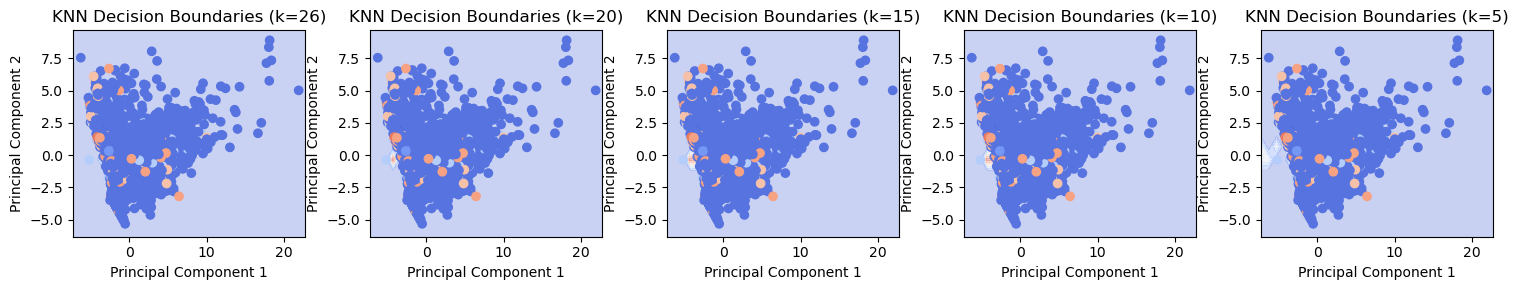

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
# Load test data and labels


# Apply label encoding to the labels


# Assuming knn_list is a list of KNN models with different k values
#knn_list = [KNeighborsClassifier(n_neighbors=k) for k in [26, 20, 15, 10, 5]]

# Specify the number of features to select
#k_best = 2  

# Remove features with low variance
#selector = VarianceThreshold()
#test_unknown_data_filtered = selector.fit_transform(test_unknown_data)

# Apply SelectKBest with ANOVA F-statistic as the scoring function
##selector = SelectKBest(f_classif, k=k_best)
#selected_data = selector.fit_transform(test_unknown_data, test_unknown_label_encoded)
##downsampled_size = 100
#indices = np.random.choice(len(test_unknown_data), downsampled_size, replace=False) 
#downsampled_data = test_unknown_data.iloc[indices]
#downsampled_labels = test_unknown_label.iloc[indices]
#downsampled_labels_endoded = label_encoder.fit_transform(downsampled_labels)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
#StandardScalar is used to reduce the size of the values to prevent memory error
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_unknown_data)
reduced_data = pca.fit_transform(scaled_data)
#reduced_data2=pca.fit_transform(downsampled_data)
print(reduced_data.size)
print(reduced_data)
#print(reduced_data2.size)
#print(reduced_data2)

knn_list = [KNeighborsClassifier(n_neighbors=k) for k in [26, 20, 15, 10, 5]]


def plot_decision_boundary(knn, X, y, title, ax):
    h = 1  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtain predictions for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_encoded = label_encoder.fit_transform(Z)
    Z = Z_encoded.reshape(xx.shape)
    print(xx.size, yy.size, Z.size)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            print(f"xx[{i}][{j}] = {xx[i][j]}, yy[{i}][{j}] = {yy[i][j]}, Z[{i}][{j}] = {Z[i][j]}")

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Set up subplots
fig, axes = plt.subplots(1, len(knn_list), figsize=(15, 3))  # Adjust figsize as needed
# Assuming downsampled_labels is defined somewhere in your code
for i, (knn, k) in enumerate(zip(knn_list, [26, 20, 15, 10, 5])):
    knn.fit(reduced_data, test_unknown_label_encoded)
    plot_decision_boundary(knn, reduced_data, test_unknown_label_encoded, f'KNN Decision Boundaries (k={k})', axes[i])


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


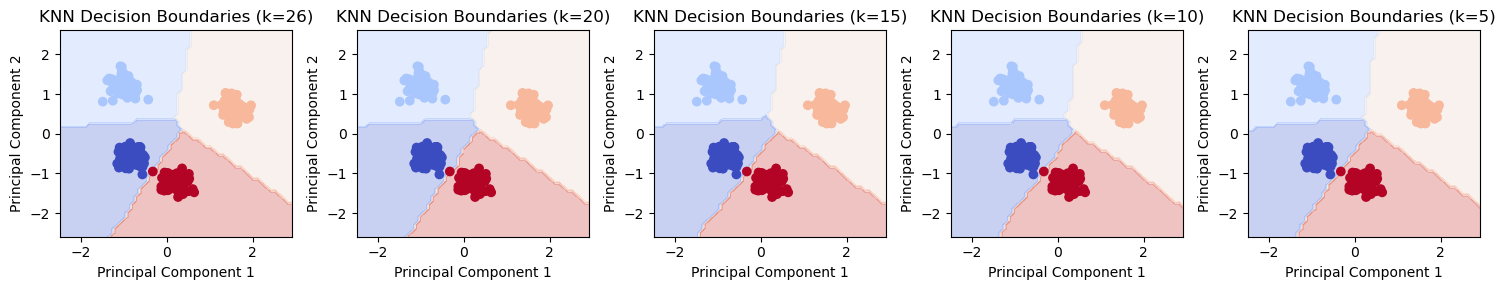

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

# Generate synthetic data with 4 clusters using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply label encoding to the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Specify the number of features to select
k_best = 2  

# Apply SelectKBest with ANOVA F-statistic as the scoring function
selector = SelectKBest(f_classif, k=k_best)
selected_data = selector.fit_transform(X, y_encoded)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
scaled_data = StandardScaler().fit_transform(selected_data)
reduced_data = pca.fit_transform(scaled_data)

# Set up k-NN classifiers with different k values
knn_list = [KNeighborsClassifier(n_neighbors=k) for k in [26, 20, 15, 10, 5]]

def plot_decision_boundary(knn, X, y, title, ax):
    h = 0.1  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtain predictions for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_encoded = label_encoder.transform(Z)
    Z = Z_encoded.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Set up subplots
fig, axes = plt.subplots(1, len(knn_list), figsize=(15, 3))  # Adjust figsize as needed

# Plot decision boundaries for each k-NN classifier
for i, (knn, k) in enumerate(zip(knn_list, [26, 20, 15, 10, 5])):
    knn.fit(reduced_data, y_encoded)
    plot_decision_boundary(knn, reduced_data, y_encoded, f'KNN Decision Boundaries (k={k})', axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
